In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [2]:
BTC = pd.read_csv("BTC-USD.csv")
IDEA = pd.read_csv("IDEA.NS.csv")
MATIC = pd.read_csv("MATIC-INR.csv")
MINDA = pd.read_csv("MINDACORP.NS.csv")
MRNA = pd.read_csv("MRNA.csv")
NIFTYBEES = pd.read_csv("NIFTYBEES.NS.csv")
PIDILITE = pd.read_csv("PIDILITIND.NS.csv")
QQQ = pd.read_csv("QQQ.csv")
SPY = pd.read_csv("SPY.csv")
TESLA = pd.read_csv("TSLA.csv")

BTC = BTC[["Date", "Adj Close"]]
IDEA = IDEA[["Date", "Adj Close"]]
MATIC = MATIC[["Date", "Adj Close"]]
MINDA = MINDA[["Date", "Adj Close"]]
MRNA = MRNA[["Date", "Adj Close"]]
NIFTYBEES = NIFTYBEES[["Date", "Adj Close"]]
PIDILITE = PIDILITE[["Date", "Adj Close"]]
QQQ = QQQ[["Date", "Adj Close"]]
SPY = SPY[["Date", "Adj Close"]]
TESLA = TESLA[["Date", "Adj Close"]]

BTC.rename(columns={"Adj Close": "BTC"}, inplace = True)
IDEA.rename(columns={"Adj Close": "IDEA"}, inplace = True)
MATIC.rename(columns={"Adj Close": "MATIC"}, inplace = True)
MINDA.rename(columns={"Adj Close": "MINDA"}, inplace = True)
MRNA.rename(columns={"Adj Close": "MRNA"}, inplace = True)
NIFTYBEES.rename(columns={"Adj Close": "NIFTYBEES"}, inplace = True)
PIDILITE.rename(columns={"Adj Close": "PIDILITE"}, inplace = True)
QQQ.rename(columns={"Adj Close": "QQQ"}, inplace = True)
SPY.rename(columns={"Adj Close": "SPY"}, inplace = True)
TESLA.rename(columns={"Adj Close": "TESLA"}, inplace = True)

In [3]:
stocks_df = pd.concat([BTC, IDEA.drop(columns=["Date"]), MATIC.drop(columns=["Date"]), MINDA.drop(columns=["Date"]),
                       MRNA.drop(columns=["Date"]), NIFTYBEES.drop(columns=["Date"]), PIDILITE.drop(columns=["Date"]),
                       QQQ.drop(columns=["Date"]), SPY.drop(columns=["Date"]), TESLA.drop(columns=["Date"])], axis = 1)

stocks_df = stocks_df.sort_values(by = ['Date'])
stocks_df.head(5)

,Date,BTC,IDEA,MATIC,MINDA,MRNA,NIFTYBEES,PIDILITE,QQQ,SPY,TESLA
0,2023-10-25,34502.820313,10.85,51.846760,331.799988,76.760002,211.479996,2295.399902,349.457825,415.863892,212.419998
1,2023-10-26,34156.648438,10.75,52.411217,336.700012,75.980003,208.740005,2316.800049,342.794647,410.884094,205.759995
2,2023-10-27,33909.800781,10.90,52.651867,329.149994,71.910004,210.570007,2312.149902,344.440460,409.021637,207.300003
3,2023-10-28,34089.574219,11.65,50.861927,325.799988,74.070000,211.520004,2458.000000,348.320679,413.911835,197.360001
4,2023-10-29,34538.480469,11.85,51.771561,339.200012,75.959999,210.979996,2406.350098,349.986481,416.511292,200.839996


In [4]:
def normalize_stocks(df):
    df_ = df.copy()
    for stock in df_.columns[1:]:
        df_[stock] = df_[stock] / df_.loc[0, stock]
    return df_

norm_stocks_df = normalize_stocks(stocks_df)
norm_stocks_df.head(5)

,Date,BTC,IDEA,MATIC,MINDA,MRNA,NIFTYBEES,PIDILITE,QQQ,SPY,TESLA
0,2023-10-25,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2023-10-26,0.989967,0.990783,1.010887,1.014768,0.989838,0.987044,1.009323,0.980933,0.988025,0.968647
2,2023-10-27,0.982812,1.004608,1.015529,0.992013,0.936816,0.995697,1.007297,0.985642,0.983547,0.975897
3,2023-10-28,0.988023,1.073733,0.981005,0.981917,0.964956,1.000189,1.070837,0.996746,0.995306,0.929103
4,2023-10-29,1.001034,1.092166,0.998550,1.022303,0.989578,0.997636,1.048336,1.001513,1.001557,0.945485


In [5]:
fig = px.line(title = "Normalized stock prices")

for stock in norm_stocks_df.columns[1:]:
    fig.add_scatter(x = norm_stocks_df["Date"], y = norm_stocks_df[stock], name = stock)
fig.show()

In [6]:
def daily_return_estimator(df):
    df_daily_return = df.copy()

    for i in df.columns[1:]:
        for j in range(1, len(df)):
            df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100

        df_daily_return.loc[0, i] = 0

    return df_daily_return

In [7]:
stocks_daily_return = daily_return_estimator(stocks_df)
stocks_daily_return.head(5)

,Date,BTC,IDEA,MATIC,MINDA,MRNA,NIFTYBEES,PIDILITE,QQQ,SPY,TESLA
0,2023-10-25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2023-10-26,-1.003315,-0.921659,1.088703,1.476801,-1.016153,-1.295627,0.932306,-1.906719,-1.197459,-3.135299
2,2023-10-27,-0.722693,1.395349,0.459157,-2.242358,-5.356671,0.876690,-0.200714,0.480116,-0.453280,0.748449
3,2023-10-28,0.530152,6.880734,-3.399576,-1.017775,3.003749,0.451155,6.307986,1.126528,1.195584,-4.794984
4,2023-10-29,1.316843,1.716738,1.788438,4.112960,2.551639,-0.255299,-2.101298,0.478238,0.628022,1.763273


Text(0.5, 1.0, 'Daily returns of the stocks')

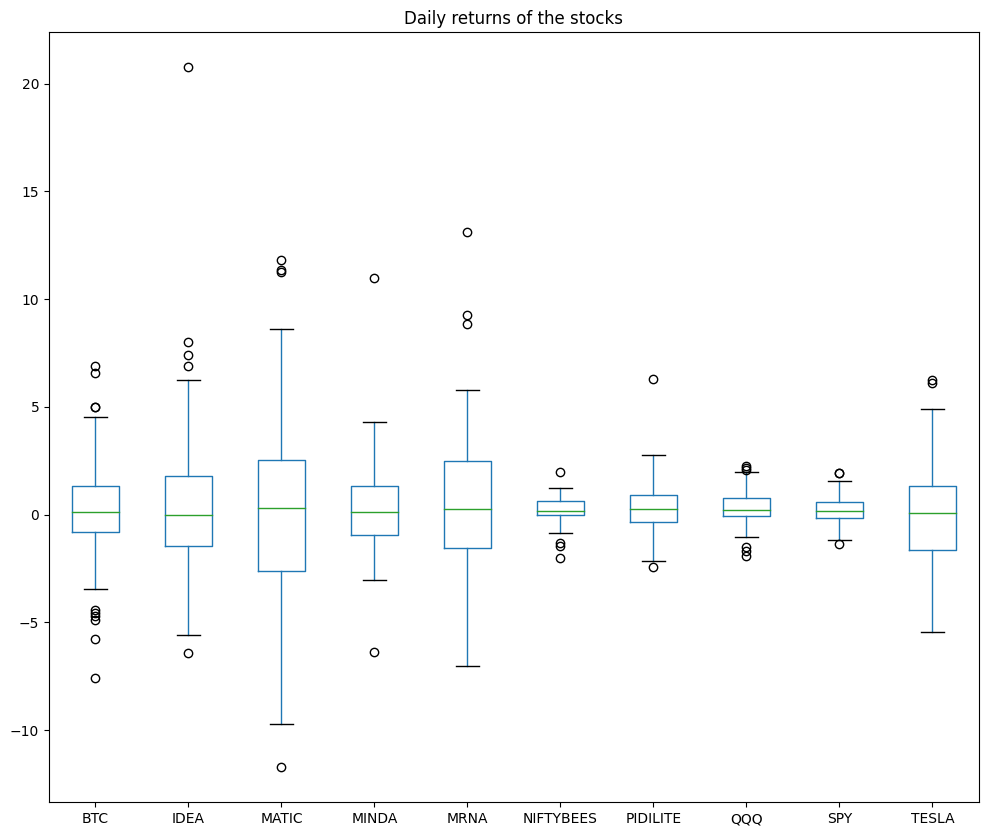

In [8]:
stocks_daily_return.boxplot(figsize=(12, 10), grid=False)
plt.title("Daily returns of the stocks")

Text(0.5, 1.0, 'Daily returns of the stocks')

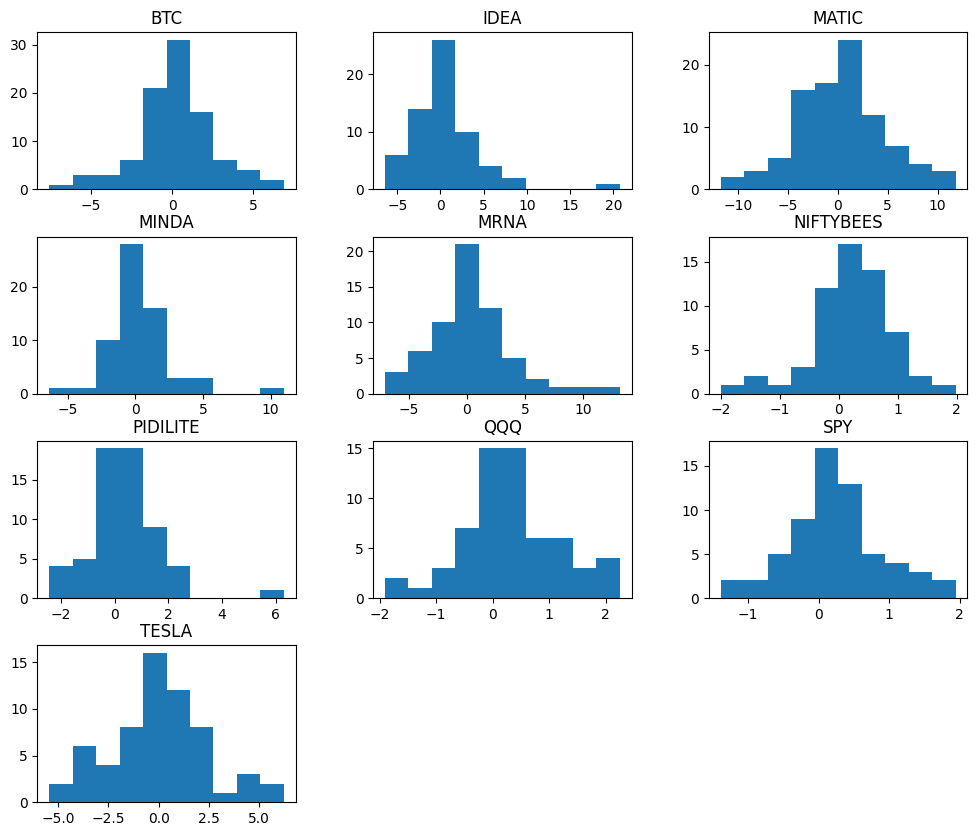

In [9]:
stocks_daily_return.hist(figsize=(12, 10), grid=False)
plt.title("Daily returns of the stocks")